In [1]:
import face_recognition as fr
import matplotlib.pyplot as plt
import numpy as np
image = fr.load_image_file("images-mimic/train/Disgust/trainDisgust037_097.jpg")
landmarks = fr.face_landmarks(image)

In [2]:
points = []
for k in landmarks[0]:
    for p in landmarks[0][k]:
        points.append(list(p))
points = np.array(points)

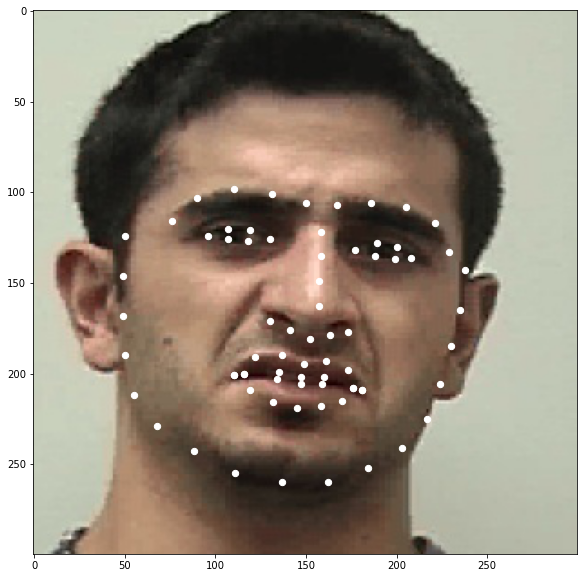

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.scatter(points[:,0],points[:,1], s = 40, c = 'white')
plt.savefig('demo_pic.jpg')
plt.show()